In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
customer_df = pd.read_csv('Cusotmer_Info.csv')

In [49]:
customer_df_encoded = pd.get_dummies(customer_df, columns=['Category','Region'])

features = ['avg_transaction_price', 'num_transactions', 'signup_year'] + \
           [col for col in customer_df_encoded.columns if col not in ['CustomerID', 'avg_transaction_price', 'num_transactions', 'signup_year']]
customer_df_encoded[features]

,avg_transaction_price,num_transactions,signup_year,Category_Books,Category_Clothing,Category_Electronics,Category_Home Decor,Region_Asia,Region_Europe,Region_North America,Region_South America
0,278.334000,5,2022,False,False,True,False,False,False,False,True
1,208.920000,4,2022,False,True,False,False,True,False,False,False
2,195.707500,4,2024,False,False,False,True,False,False,False,True
3,240.636250,8,2022,True,False,False,False,False,False,False,True
4,291.603333,3,2022,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
194,416.992500,4,2022,False,False,False,True,False,True,False,False
195,227.056667,3,2023,False,False,True,False,False,True,False,False
196,239.705000,2,2022,False,True,False,False,False,True,False,False
197,250.610000,4,2022,False,False,True,False,False,True,False,False


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df_encoded[features])

In [51]:

results = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    db_index = davies_bouldin_score(X_scaled, labels)
    silhouette_avg = silhouette_score(X_scaled, labels)
    
    results.append({'n_clusters': n_clusters, 'DB_Index': db_index, 'Silhouette_Score': silhouette_avg})

results_df = pd.DataFrame(results)
optimal_clusters = results_df.loc[results_df['DB_Index'].idxmin(), 'n_clusters']



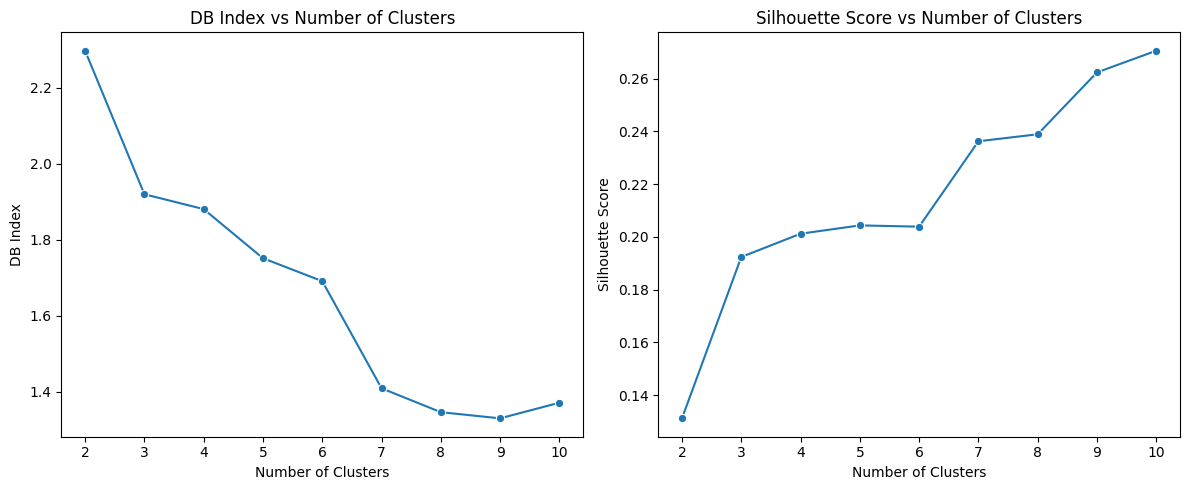

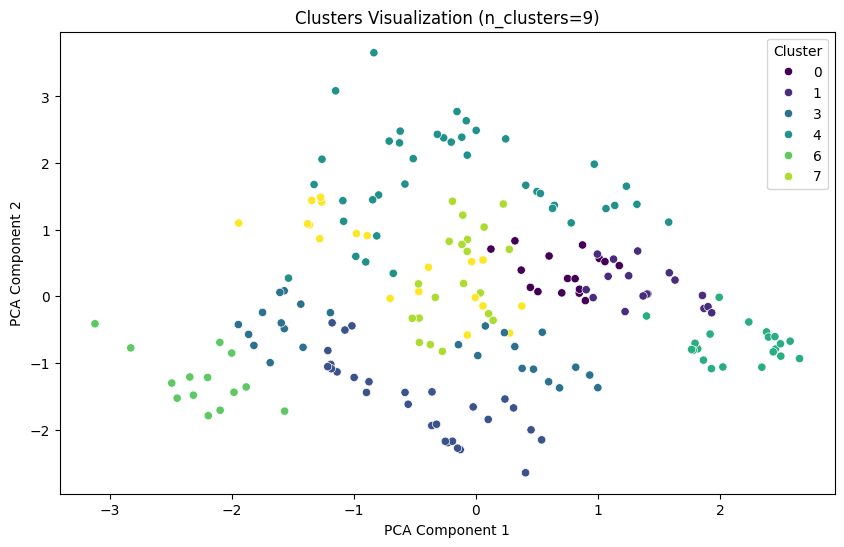

In [52]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='n_clusters', y='DB_Index', data=results_df, marker='o')
plt.title('DB Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

plt.subplot(1, 2, 2)
sns.lineplot(x='n_clusters', y='Silhouette_Score', data=results_df, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=int(optimal_clusters), random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
customer_df['PCA1'] = X_pca[:, 0]
customer_df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_df, palette='viridis')
plt.title(f'Clusters Visualization (n_clusters={optimal_clusters})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')